### Imports

In [118]:
import pandas as pd
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
from astropy.constants import c, k_B,R_earth


%matplotlib inline   

### Read FM Transmitter Database 

In [119]:
##### FM transmitter data for the countries: CANADA, AUSTRALIA ,GERMANY,USA and SOUTH AFRICA ####
##### EIRP in Watts #####
##### Latitude ranges from 90(N.Pole) to 0 (EQUATOR) to -90(S.Pole) ########
##### Longitude ranges between 0 and 360 degree eastwards ############

df=pd.read_csv("/home/sonia/rfi/Final_Revised.csv")
df.dropna(subset = ["Latitude in degrees"], inplace=True)
df

,Latitude in degrees,Longitude in degrees,Frequency(MHz),EIRP
0,50.947181,8.532986,87.6,164000.0
1,53.509289,10.093932,87.6,131200.0
2,49.832397,9.592726,87.6,41000.0
3,49.629033,7.820645,87.6,820.0
4,49.681928,7.327415,87.6,328.0
...,...,...,...,...
15644,52.294536,181.946878,104.6,164.0
15645,52.115714,182.330147,104.4,1640.0
15646,52.892406,180.655972,104.0,82.0
15647,53.335814,180.171983,104.7,4920.0


In [120]:
rslt_df = df[df['Frequency(MHz)'] < 88]
rslt_df

,Latitude in degrees,Longitude in degrees,Frequency(MHz),EIRP
0,50.947181,8.532986,87.6,164000.00
1,53.509289,10.093932,87.6,131200.00
2,49.832397,9.592726,87.6,41000.00
3,49.629033,7.820645,87.6,820.00
4,49.681928,7.327415,87.6,328.00
...,...,...,...,...
15623,35.709981,139.810653,82.5,93480.00
15624,35.626878,139.631378,83.4,68.88
15625,35.440067,139.231217,84.7,34440.00
15626,35.852597,139.614883,85.1,67240.00


In [121]:
rslt_df1 = df[df['Frequency(MHz)'] < 87]
rslt_df1

,Latitude in degrees,Longitude in degrees,Frequency(MHz),EIRP
15615,35.524475,139.664092,76.5,6068.00
15616,35.697394,140.046569,78.0,37720.00
15617,35.577647,139.658036,79.1,149.24
15618,35.958753,139.210067,79.5,60680.00
15619,35.658614,139.745422,80.0,205000.00
15620,35.697394,140.046569,80.7,41000.00
15621,35.709981,139.810653,81.3,93480.00
15622,35.360283,139.595900,81.9,31160.00
15623,35.709981,139.810653,82.5,93480.00
15624,35.626878,139.631378,83.4,68.88


### Define frequency range  

In [123]:
###### For our code the frequency range is 56MHz-109 MHz with a sampling 0.9765625 #of 61KHz =0.061 MHz #######


def get_non_negative_int(prompt):
    while True:
        try:
            value = float(input(prompt))
        except ValueError:
            print("There is an error in the input.")
            continue

        if value<=0:
            print("There is an error in the input.The input cannot be zero or negative")
       # elif value<0:
        #    print("The input must not be negative.")
            continue
        else:
            break
    return value

fstart = get_non_negative_int("Please enter the minimum value of the frequency range: ")
fstop = get_non_negative_int("Please enter the maximum value of the frequency range: ")
fres=get_non_negative_int("Please enter the resolution of the frequency: ")


Please enter the minimum value of the frequency range: 56
Please enter the maximum value of the frequency range: 109
Please enter the resolution of the frequency: 0.9765625


In [124]:
freq_rfi=np.arange(fstart,fstop,fres)


%store freq_rfi     
    
    
#### Array consisting of frequencies from the dataset
data_freq=df['Frequency(MHz)'].values

diff=np.zeros((len(data_freq),len(freq_rfi)),dtype=object)
freq_arr=np.zeros(len(data_freq))


for i in range(len(data_freq)):
    for j in range(len(freq_rfi)):
        diff[i][j]=abs(data_freq[i]-freq_rfi[j])
        freq_arr[i]=freq_rfi[np.argmin(diff[i])]

        
##### Create column to store the new frequencies based on the user defined frequency axis #####
df['New Frequency']=freq_arr

Stored 'freq_rfi' (ndarray)


### Define resolution of the Healpy map

In [125]:
print('-----------Resolution of the map---------') 
nside = 16
print(f"The number of pixels for the given NSIDE: {(hp.nside2npix(nside))}")
print(f"Approximate resolution in degrees for given nside {np.degrees(hp.nside2resol(nside)):.2f}")
print( "Pixel area: %.2f square degrees" % hp.nside2pixarea(nside, degrees=True))



-----------Resolution of the map---------
The number of pixels for the given NSIDE: 3072
Approximate resolution in degrees for given nside 3.66
Pixel area: 13.43 square degrees


### Allocate pixel number to the Latitude and Longitude of each FM transmitter in the database

In [126]:
pixel_indices = hp.ang2pix(nside, df['Longitude in degrees'].to_numpy() ,df['Latitude in degrees'].to_numpy(),lonlat=True)
df['Pixel_number']=pixel_indices 
df

/home/sonia/anaconda3/lib/python3.8/site-packages/healpy/pixelfunc.py:475: RuntimeWarning: invalid value encountered in _ang2pix_ring
  return pixlib._ang2pix_ring(nside, theta, phi)


,Latitude in degrees,Longitude in degrees,Frequency(MHz),EIRP,New Frequency,Pixel_number
0,50.947181,8.532986,87.6,164000.0,87.250000,313
1,53.509289,10.093932,87.6,131200.0,87.250000,265
2,49.832397,9.592726,87.6,41000.0,87.250000,365
3,49.629033,7.820645,87.6,820.0,87.250000,365
4,49.681928,7.327415,87.6,328.0,87.250000,365
...,...,...,...,...,...,...
15644,52.294536,181.946878,104.6,164.0,104.828125,338
15645,52.115714,182.330147,104.4,1640.0,104.828125,338
15646,52.892406,180.655972,104.0,82.0,103.851562,338
15647,53.335814,180.171983,104.7,4920.0,104.828125,338


### Check for pixel number for a given pair of latitude and longitude in degree

In [7]:
###### Pixel numbers based on NSIDE=16 ########
### Germany(51.1657,10.4515)= 313, Australia(-25.2744,133.7751)=2167, Hanle(32.81302, 78.87130)= 686


#pixie = hp.ang2pix(nside,78.871,32.81 ,lonlat=True)
#pixie




In [9]:
pixie = hp.ang2pix(nside,11.5820,48.1351 ,lonlat=True)
pixie

365

### Conversion of the pixel numbers of the Healpy map to corresponding angular coordinates

In [127]:
NPIX = hp.nside2npix(nside) # Storing the number of pixels of the map corresponding to the given NSIDE
arr=np.arange(NPIX) #Create an an array of pixel numbers with respect to the NSIDE

phi,theta = (hp.pix2ang(nside, ipix=arr,lonlat=True)) # Array of the angular coordinates co-latitude(theta) 
                                                        #and longitude(phi) in degrees 
                                                       # With respect to the given NSIDE


### Define altitude of the satellite orbit 

In [128]:
#Creating user defined data points between 400 km to 36000 km in log scale
data_point=int(input("Enter number of data points : "))
altitude= np.logspace(np.log10(400),np.log10(36000),data_point) 
print(altitude)


Enter number of data points : 3
[  400.         3794.7331922 36000.       ]


### Calculation of Elevation angle

In [129]:
x_ang=np.zeros((NPIX,NPIX))
y_ang=np.zeros((NPIX,NPIX))
elev_ang=np.zeros((len(altitude),NPIX,NPIX))
R_E=R_earth.to('km').value
for k in range(len(altitude)):
    for i in range(len(theta)):
        for j in range(len(theta)):
        
            x_ang[i,j]=((np.cos(np.radians(theta[i])))*(np.cos(np.radians(theta[j])))*(np.cos(np.radians(phi[j]-phi[i])))+(np.sin(np.radians(theta[i])))*(np.sin(np.radians(theta[j]))))
            y_ang[i,j]=(np.arccos(x_ang[i,j]))
            B=(altitude[k]+R_E)/R_E
            elev_ang[k,i,j]=-(np.degrees(np.arctan((B-np.cos(np.radians(y_ang[i,j])))/np.sin(np.radians(y_ang[i,j]))))-y_ang[i,j])

<ipython-input-129-a9cf50e69add>:12: RuntimeWarning: divide by zero encountered in double_scalars
  elev_ang[k,i,j]=-(np.degrees(np.arctan((B-np.cos(np.radians(y_ang[i,j])))/np.sin(np.radians(y_ang[i,j]))))-y_ang[i,j])
<ipython-input-129-a9cf50e69add>:10: RuntimeWarning: invalid value encountered in arccos
  y_ang[i,j]=(np.arccos(x_ang[i,j]))


In [12]:
####To check for max/min value of the array eliminating the nan values #####

#np.max(elev_ang[1,:,:][np.logical_not(np.isnan(elev_ang[1,:,:]))])

In [13]:
#plt.imshow(elev_ang[0,:,:])# 400km # with phi=100
#plt.colorbar()

In [14]:
#df_el.iloc[0]
#pixel_ind2 = np.where(df_el.iloc[0]<0)
#print(pixel_ind2)

### Define radiation pattern of the satellite antenna beam [optional]

In [130]:
# Function for Radiation pattern of the satellite antenna beam #

beam = lambda theta, phi:(np.cos(np.radians(theta)))**2   # (np.sin(np.radians(theta)))**2
beam1 = lambda theta, phi:(np.sin(np.radians(theta)))**2 
az=0 # Assuming the satellite antenna beam to be symmetric across azimuth

###  Calculation of Field of view (FOV) and Radius of the FOV of the satellite

In [131]:
###########-----------------Considering Nadir-pointing Field of View Geometry-------######
##########-----------------Considering the FOV of the satellite to be tangent to the surface of the Earth------######


FOV=np.zeros(len(altitude))
for i in range(0,len(altitude)):
# Consider a case of full coverage under elevation of 0 º
   
    FOV[i]= 2*np.arcsin(R_E/(R_E+ altitude[i]))  # Field of view for maximal coverage in radians when elevation is 0 º 
    print(" The Field of view of the satellite at a height of",altitude[i],"km is",FOV[i], "radians")

 The Field of view of the satellite at a height of 400.0000000000001 km is 2.4510662859463395 radians
 The Field of view of the satellite at a height of 3794.733192202054 km is 1.3553252050274054 radians
 The Field of view of the satellite at a height of 35999.99999999996 km is 0.3021573821256571 radians


In [132]:
# The surface of the coverage area of the Earth depends on the central angle
Central_angle=np.zeros(len(altitude))
for i in range(0,len(altitude)):
    Central_angle[i]=np.arccos(R_E/(R_E+altitude[i])) # Central angle in radians
    
    Dia_of_FOV=2*Central_angle*R_E  # Diameter of the FOV (disc on the Earth's surface)in km
    Rad_of_FOV= Dia_of_FOV/2 # Radius of the FOV in km
    Rad_of_FOV=Rad_of_FOV/R_E  # Radius of the FOV in Radians
    print(" The Radius of the Field of View for a height of",altitude[i],"km in radians is",Rad_of_FOV[i])


 The Radius of the Field of View for a height of 400.0000000000001 km in radians is 0.34526318382172694
 The Radius of the Field of View for a height of 3794.733192202054 km in radians is 0.893133724281194
 The Radius of the Field of View for a height of 35999.99999999996 km in radians is 1.419717635732068


In [133]:
90-np.degrees(Central_angle[0]) # Max observable latitude at 400km

70.21787674576552

In [19]:
90-np.degrees(Central_angle[1]) # Max observable latitude at 36000km

8.6561713722609

In [20]:
90-np.degrees(FOV[0]) # Elevation angle w.r.t geometric FOV at 400km

-50.435753491531045

In [21]:
90-np.degrees(FOV[1]) # Elevation angle w.r.t geometric FOV at 36000km

72.68765725547819

# Create power cube 

In [134]:
###############-----Storing indices of the pixel number that are inside the circle/disc(FOV) wrt the altitude-----------######


vec1 = hp.ang2vec(phi,theta,lonlat=True) #Using ang2vec convert angles that is co-latitude and longitude in radians
                                        #to 3D position vector
    
disc=np.zeros((len(arr),len(Rad_of_FOV)),dtype=object)#Array of indices of the pixel number that are inside the 
                                                      #circle/disc specified by vec and radius
def pixel_disc(a,b):
    for i in range(len(a)):
        for j in range(len(b)):
            disc[j][i]=hp.query_disc(nside, vec1[j], radius=a[i])
pixel_disc(Rad_of_FOV,arr)

In [135]:
######-----Storing indices of the pixel number that are common between the FOV disc and the satellite pixel no------####


Comm_pix=np.zeros((len(disc[:,i]),len(Rad_of_FOV)),dtype=object)

for i in range(len(Rad_of_FOV)):
    for k in range(len(disc[:,i])):
     

         Comm_pix[k][i]=np.intersect1d(pixel_indices,disc[k][i])#Array of indices of the pixel number that are
                                                           #common between the FOV disc and the satellite pixel no
         
        

In [136]:
######-----Storing indices of the pixel number that are common between the FOV disc and the satellite pixel no ------#
######-----And the same pixel number of the transmitters-----##



######--- Initializing the array to store the pixel number that are common between the FOV disc ---####
######                        and the satellite pixel no    ######
Comm_TX=np.zeros((len(Comm_pix),len(Rad_of_FOV)),dtype=object)
found_common=np.zeros(( len(Comm_pix),len(Rad_of_FOV)),dtype=object)

for j in range(len(Rad_of_FOV)):
    for i in range(len(Comm_pix)):
        
        Comm_TX[i][j]=set(Comm_pix[i][j])
        found_common[i][j] = [l for l in pixel_indices if l in Comm_TX[i][j]]#Array of indices of the pixel number that 
                                            #are common between the FOV disc and the satellite pixel no with
                                                    # Tx having same pixel number
                                                                       
         

In [17]:
#########------- Cross checking the array being created-----#########

#df3 = pd.DataFrame(found_common)
#df3

## Plot Healpy map of beam-weighted FOV of a satellite overhead a particular location

<b> Transmitter locations from the FM Transmitter database and the received power at different altitudes has not been taken into account for these plots <b>

In [87]:
#Array of indices of the pixel number that are inside the FOV
xx=disc[2363][0]  # FOr Australia at an altitude of 400 km
xx1=disc[2363][1]  # FOr Australia at an altitude of 36000 km
xx2=disc[313][0]   # FOr Germany at an altitude of 400 km
xx3=disc[313][1]  # FOr Germany at an altitude of 36000 km
xx4=disc[686][0]  # FOr Hanle at an altitude of 400 km
xx5=disc[686][1]   # FOr Hanle at an altitude of 36000 km


### Beam pattern values overhead a particular location
y=beam(elev_ang[0,2363,xx],az)
y1=beam(elev_ang[1,2363,xx1],az)
y2=beam(elev_ang[0,313,xx2],az)
y3=beam(elev_ang[1,313,xx3],az)
y4=beam(elev_ang[0,686,xx4],az)
y5=beam(elev_ang[1,686,xx5],az)

data= np.zeros(hp.nside2npix(nside))
data1= np.zeros(hp.nside2npix(nside))
data2= np.zeros(hp.nside2npix(nside))
data3= np.zeros(hp.nside2npix(nside))
data4= np.zeros(hp.nside2npix(nside))
data5= np.zeros(hp.nside2npix(nside))
point=np.arange(len(xx))

data[xx]=y
data1[xx1]=y1
data2[xx2]=y2
data3[xx3]=y3
data4[xx4]=y4
data5[xx5]=y5

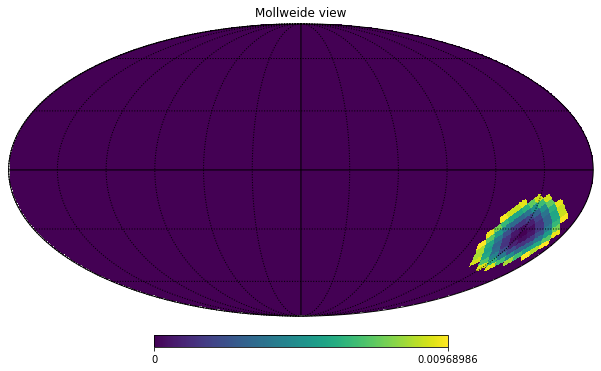

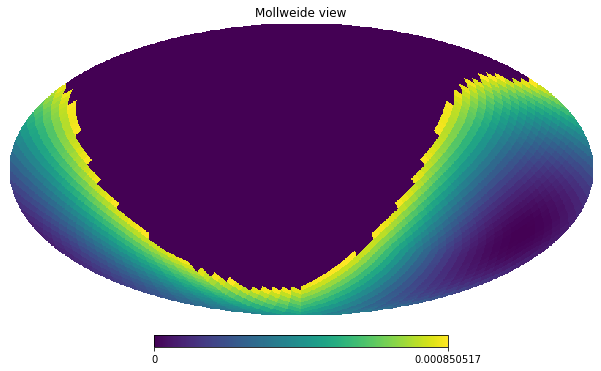

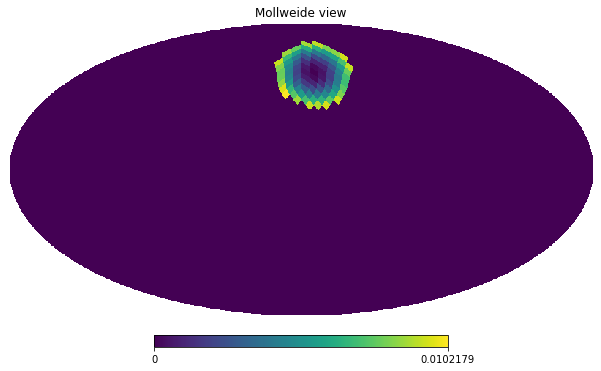

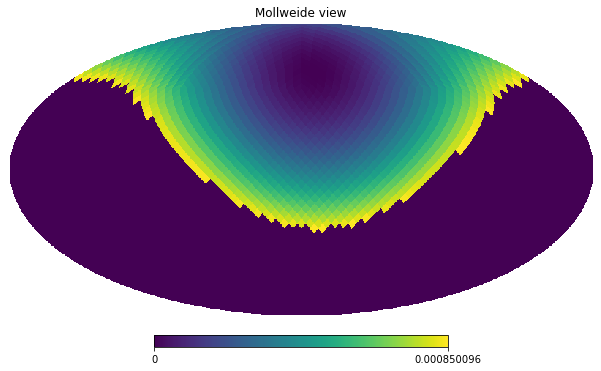

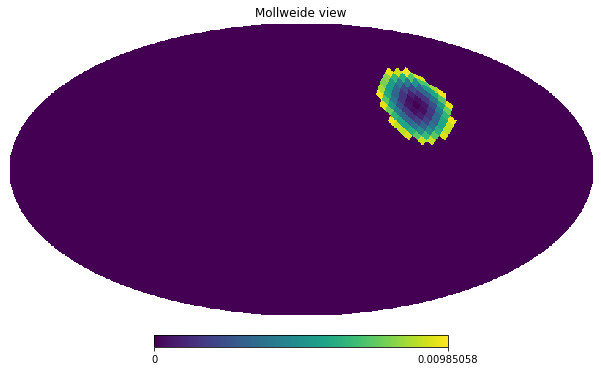

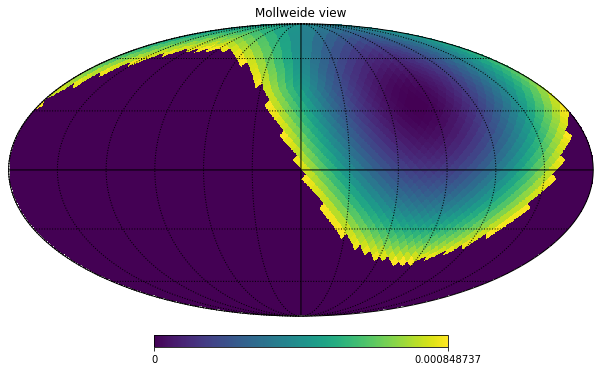

In [88]:
hp.mollview(data,flip='geo')
hp.graticule()
hp.mollview(data1,flip='geo')
hp.mollview(data2,flip='geo')
hp.mollview(data3,flip='geo')
hp.mollview(data4,flip='geo')
hp.mollview(data5,flip='geo')


hp.graticule()

<b> Transmitter locations from the FM Transmitter database has been taken into account BUT the received power at different altitudes has not been taken into account for these plots <b>

In [85]:
#Array of indices of the pixel number that are common to the FOV and TX database
x=Comm_pix[2363][0]  # FOr Australia at an altitude of 400 km
x1=Comm_pix[2363][1]  # FOr Australia at an altitude of 36000 km
x2=Comm_pix[313][0]   # FOr Germany at an altitude of 400 km
x3=Comm_pix[313][1]  # FOr Germany at an altitude of 36000 km
x4=Comm_pix[686][0]  # FOr Hanle at an altitude of 400 km
x5=Comm_pix[686][1]   # FOr Hanle at an altitude of 36000 km

yy=beam(elev_ang[0,2363,x],az)
yy1=beam(elev_ang[1,2363,x1],az)
yy2=beam(elev_ang[0,313,x2],az)
yy3=beam(elev_ang[1,313,x3],az)
yy4=beam(elev_ang[0,686,x4],az)
yy5=beam(elev_ang[1,686,x5],az)

d= np.zeros(hp.nside2npix(nside))
d1= np.zeros(hp.nside2npix(nside))
d2= np.zeros(hp.nside2npix(nside))
d3= np.zeros(hp.nside2npix(nside))
d4= np.zeros(hp.nside2npix(nside))
d5= np.zeros(hp.nside2npix(nside))
#point=np.arange(len(xx))
#data[0:np.size(arr[0:1499])]=arr[0:1499]
d[x]=yy
d1[x1]=yy1
d2[x2]=yy2
d3[x3]=yy3
d4[x4]=yy4
d5[x5]=yy5


/home/sonia/anaconda3/lib/python3.8/site-packages/healpy/projaxes.py:920: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_over(newcm(1.0))
/home/sonia/anaconda3/lib/python3.8/site-packages/healpy/projaxes.py:921: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_under(bgcolor)
/home/sonia/anaconda3/lib/python3.8/site-packages/healpy/projaxes.py:922: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a 

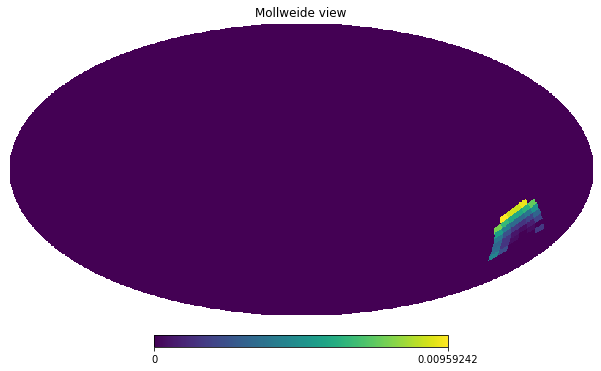

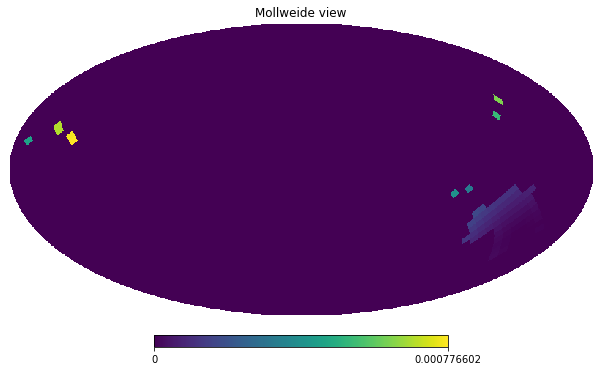

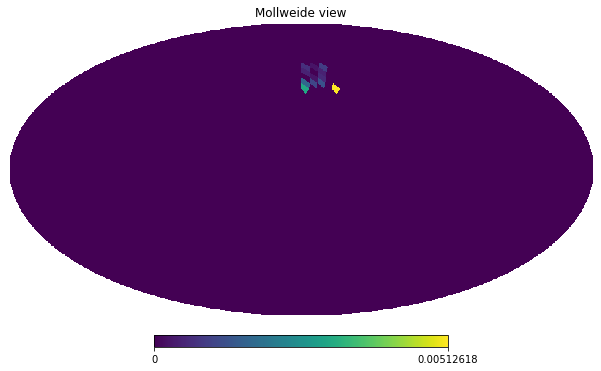

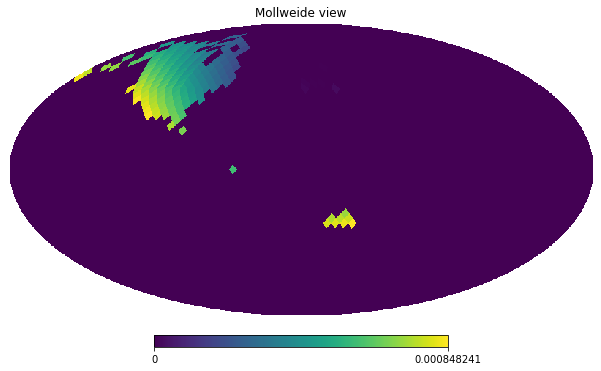

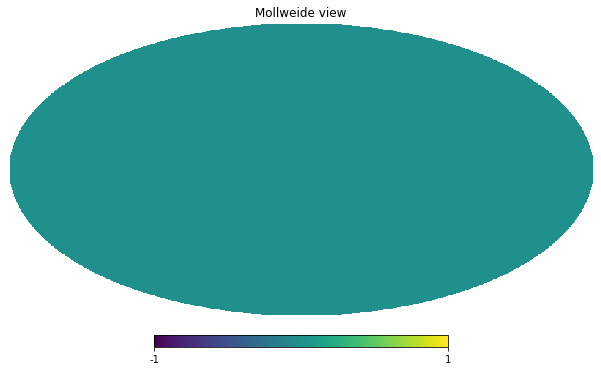

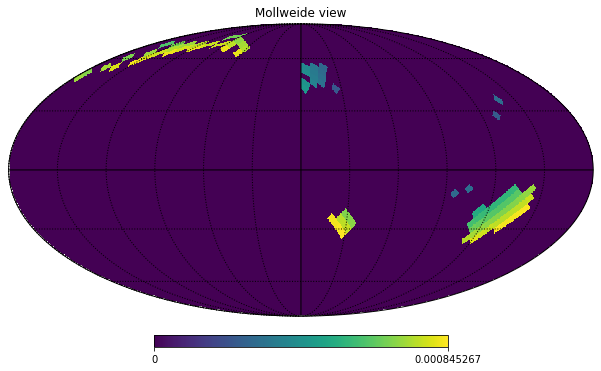

In [86]:
hp.mollview(d,flip='geo')
hp.mollview(d1,flip='geo')
hp.mollview(d2,flip='geo')
hp.mollview(d3,flip='geo')
hp.mollview(d4,flip='geo')
hp.mollview(d5,flip='geo')


hp.graticule()

In [201]:
#######-------Store the values of the received power in Watt,dBm and Kelvin wrt altitude----#####
######------- Calculation of the received power using Friis Transmission Equation--------#######
######-------Considering isotropic transmitter and receiver with gain =1 -------------#########


res=61*1e3
Rx_Power= np.zeros((len(df),len(altitude)))
Rx_Power_in_Kelvin=np.zeros((len(df),len(altitude)))
Rx_Power_in_dBm=np.zeros((len(df),len(altitude)))
Rx_Power_in_dBW=np.zeros((len(df),len(altitude)))
for i in range(0,len(altitude)):
    for j in range(0,len(df)):
        wavelength= c.value/(df.iloc[j]['Frequency(MHz)']*1e6)
        Rx_Power[j][i]= ((df.iloc[j]['EIRP'])*(wavelength)**2)/(4*np.pi*altitude[i]*1e3)**2 #the Friis Transmission Equation
        Rx_Power_in_dBm[j][i]= 10.*np.log10( Rx_Power[j][i])+30
        Rx_Power_in_Kelvin[j][i]=Rx_Power[j][i]/(k_B.value*res)#in Kelvin
        Rx_Power_in_dBW[j][i]= 10.*np.log10( Rx_Power[j][i])
        

       

<ipython-input-201-1593f8593051>:15: RuntimeWarning: divide by zero encountered in log10
  Rx_Power_in_dBm[j][i]= 10.*np.log10( Rx_Power[j][i])+30
<ipython-input-201-1593f8593051>:17: RuntimeWarning: divide by zero encountered in log10
  Rx_Power_in_dBW[j][i]= 10.*np.log10( Rx_Power[j][i])


In [18]:
##### ---Create dataframe to store the values of the received power in dBm w.r.t the altitude----#####
df_data_db=pd.DataFrame(Rx_Power_in_dBm)
df_data_db['Pixel_number']=pixel_indices
df_data_db['New Frequency']=freq_arr
#df_data_db


NameError: name 'Rx_Power_in_dBm' is not defined

In [18]:
df_data_dbW=pd.DataFrame(Rx_Power_in_dBW)
df_data_dbW['Pixel_number']=pixel_indices
df_data_dbW['New Frequency']=freq_arr
df_data_dbW

,0,1,Pixel_number,New Frequency
0,-71.190627,-110.275477,313,87.250000
1,-72.159727,-111.244577,265,87.250000
2,-77.211227,-116.296077,365,87.250000
3,-94.200927,-133.285777,365,87.250000
4,-98.180327,-137.265177,365,87.250000
...,...,...,...,...
14732,-102.731178,-141.816028,338,104.828125
14733,-92.714555,-131.799405,338,104.828125
14734,-105.691511,-144.776361,338,103.851562
14735,-87.968266,-127.053116,338,104.828125


In [202]:
##### ---Create dataframe to store the values of the received power in Kelvin w.r.t the altitude----#####

##### The first three columns of the dataframe indicate the altitude [0=400 km, 1= 3794 km , 2= 36000 km ] #####
##### The column will vary with the user input for the number of altitudes ######

df_data=pd.DataFrame(Rx_Power_in_Kelvin)

df_data['Pixel_number']=pixel_indices
df_data['New Frequency']=freq_arr


#df_data

<b> P.S : Uncomment the line inside the loop if you want to incorporate the beam pattern <b>

In [203]:
#########  Create dataframes for the FOV for each pixel position of the satellite at different altitudes #######

######--- Initializing the array to store the dataframes for the FOV for each pixel position of the satellite #####
######            at different altitudes   ######

#beam(elev_ang[1,2167,x1],az)
df_1=np.zeros((len(found_common),len(Rad_of_FOV)),dtype=object)

for j in range(len(Rad_of_FOV)):
    for i in range(len(found_common)):
        df_1[i][j]= df_data.loc[df_data['Pixel_number'].isin(found_common[i][j])]
        df_1[i][j][j]=df_1[i][j][j]*beam(elev_ang[j,i,found_common[i,j]],az)
        
        df_1[i][j]= df_1[i][j].groupby(['New Frequency']).sum()  # df9['Pixel_number']= Column consisting of 
        df_1[i][j]= df_1[i][j].reset_index() 
        
#df_1[i][j][j]=df_1[i][j][j]*beam_pattern[j,i,found_common[i,j]]        
#df_1.drop['Pixel_number']

<ipython-input-203-02c3357da653>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1[i][j][j]=df_1[i][j][j]*beam(elev_ang[j,i,found_common[i,j]],az)


In [186]:
df_11=np.zeros((len(found_common),len(Rad_of_FOV)),dtype=object)

for j in range(len(Rad_of_FOV)):
    for i in range(len(found_common)):
        df_11[i][j]= df_data.loc[df_data['Pixel_number'].isin(found_common[i][j])]
        df_11[i][j][j]=df_11[i][j][j]#*beam1(elev_ang[j,i,found_common[i,j]],az)
        
        df_11[i][j]= df_11[i][j].groupby(['New Frequency']).sum()  # df9['Pixel_number']= Column consisting of 
        df_11[i][j]= df_11[i][j].reset_index()

<ipython-input-186-0cbb9610adeb>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_11[i][j][j]=df_11[i][j][j]#*beam1(elev_ang[j,i,found_common[i,j]],az)


In [204]:
## Initializing the 3D array to store the received power for each pixel, each frequency and at different altitudes ###

power_output=np.zeros((len(Rad_of_FOV),NPIX,len(freq_rfi)),dtype=object)



In [187]:
power_output1=np.zeros((len(Rad_of_FOV),NPIX,len(freq_rfi)),dtype=object)

In [205]:
## Create the 3D array to store the received power for each pixel, each frequency and at different altitudes ##
## k: loops along the length of the number of altitude
## m: loops along the length of the number of pixels based on the given NSIDE
## l: loops along the length of the number of frequencies in the frequency axis defined by user



for k in range(len(Rad_of_FOV)):
    for m in range(NPIX):    
        for l in range(len(freq_rfi)):
            if (df_1[m][k][k][df_1[m][k]['New Frequency'] == freq_rfi[l]].values).size==0:# checking for empty dataframes
                power_output[k][m][l]=0
            else: 
                power_output[k][m][l]=float(df_1[m][k][k][df_1[m][k]['New Frequency'] == freq_rfi[l]].values)
           
        

In [188]:
for k in range(len(Rad_of_FOV)):
    for m in range(NPIX):    
        for l in range(len(freq_rfi)):
            if (df_11[m][k][k][df_11[m][k]['New Frequency'] == freq_rfi[l]].values).size==0:# checking for empty dataframes
                power_output1[k][m][l]=0
            else: 
                power_output1[k][m][l]=float(df_11[m][k][k][df_11[m][k]['New Frequency'] == freq_rfi[l]].values)
           
        

In [36]:
%store power_output

Stored 'power_output' (ndarray)


In [37]:
#power_output[1,arr!=313,:]=0

## Plot Power Spectrum 

<b> The first index represents altitude of the satellite <b>\
<b> The second index represents location of the satellite(pixel number) <b>\
<b> The third index represents range of frequencies <b>

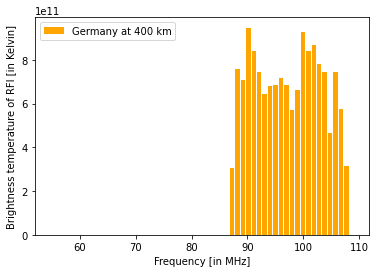

In [80]:
#Without beam weighting
plt.bar(freq_rfi,power_output[0,313,:], label='Germany at 400 km', color='orange') 
plt.xlabel('Frequency [in MHz]')
plt.ylabel('Brightness temperature of RFI [in Kelvin]')
plt.legend()

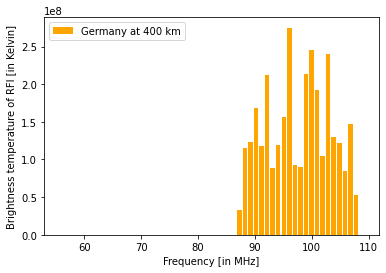

In [24]:
plt.bar(freq_rfi,power_output[0,313,:], label='Germany at 400 km', color='orange') 
plt.xlabel('Frequency [in MHz]')
plt.ylabel('Brightness temperature of RFI [in Kelvin]')
plt.legend()

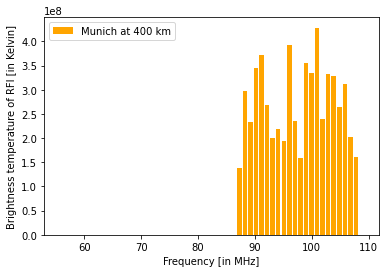

In [27]:
plt.bar(freq_rfi,power_output[0,365,:], label='Munich at 400 km', color='orange') 
plt.xlabel('Frequency [in MHz]')
plt.ylabel('Brightness temperature of RFI [in Kelvin]')
plt.legend()

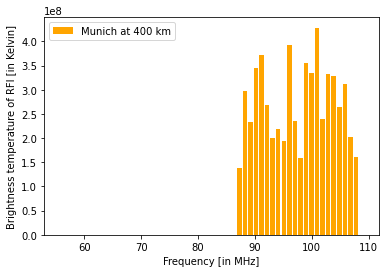

In [142]:
plt.bar(freq_rfi,power_output[0,365,:], label='Munich at 400 km', color='orange') 
plt.xlabel('Frequency [in MHz]')
plt.ylabel('Brightness temperature of RFI [in Kelvin]')
plt.legend()

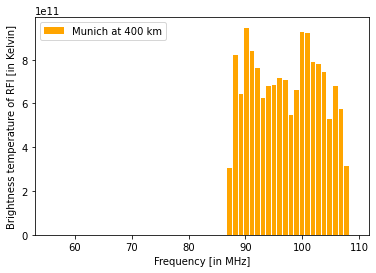

In [75]:
plt.bar(freq_rfi,power_output1[0,365,:], label='Munich at 400 km', color='orange') 
plt.xlabel('Frequency [in MHz]')
plt.ylabel('Brightness temperature of RFI [in Kelvin]')
plt.legend()

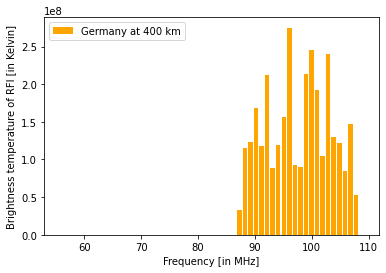

In [22]:
plt.bar(freq_rfi,power_output[0,313,:], label='Germany at 400 km', color='orange') 
plt.xlabel('Frequency [in MHz]')
plt.ylabel('Brightness temperature of RFI [in Kelvin]')
plt.legend()
#plt.suptitle('Power spectrum for GERMANY at an altitude of 400 km',fontsize=14, fontweight="bold")

In [95]:
freq_rfi[35]

90.1796875

In [51]:
power_output[0,313, 36]

168638948.1870908

In [50]:
power_output[1,313, 36]


264628.6504842875

In [86]:
power_output[2,2363, 35]

5058.677657430936

In [87]:
power_output[1,2363, 35]

221243.61176167493

In [88]:
power_output[0,2363, 35]

617401615.850835

In [23]:
power_output[1,2363, 36] ## 19.07.22

336675.9990266512

In [31]:
power_output1[1,2363, 36]

10656245834.556301

In [51]:
power_output1[1,2363, 35]

5760246373.938227

In [52]:
power_output1[0,2363, 35]

510950692219.36194

In [53]:
power_output1[2,2363, 35]

71333293.70659699

In [206]:
power_output[0,2363, 36]

1155936684.9423919

In [33]:
power_output1[0,2363, 36]

955808718349.808

In [24]:
power_output[0,2363, 36] ## 19.07.22

1155936684.9423919

In [23]:
power_output[0,2363, 36]

1155936684.9423919

In [30]:
power_output[2,2363, 36]

4353.329415521165

In [34]:
power_output1[2,2363, 36]

124211519.47274002

In [113]:
power_output1[2,2363, 35]# without beam pattern
#Observation: there is a difference of nearly 5000 Kelvin between brightness temp with sin2 beam pattern and no beam pattern. 
#Brightness temperature for no beam pattern being higher.

71338352.38425437

In [37]:
power_output[2,2363, 36]

4353.329415521165

In [25]:
power_output[0,2167, 36]

5368491924.490508

In [104]:
mock=np.int(input("Enter number of data points : "))
height= np.logspace(np.log10(400),np.log10(36000),mock) 
height


<ipython-input-104-ec06cb54beb3>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mock=np.int(input("Enter number of data points : "))


Enter number of data points : 20


array([  400.        ,   506.89132678,   642.34704292,   814.0003621 ,
        1031.52430887,  1307.17681383,  1656.49147375,  2099.15290234,
        2660.10599947,  3370.96164863,  4271.77805652,  5413.31811698,
        6859.91000654,  8693.07221206, 11016.10726848, 13959.92307326,
       17690.40982098, 22417.78826373, 28408.45609135, 36000.        ])

In [69]:
# Friis curve generated using ladder approach

P=power_output[0,2363, 35]
for i in range (0,99):
    if i==0:
        P=P=np.append(P,(P*(height[i]**2))/(height[i+1]**2))
    else:
        
        P=np.append(P,(P[i]*(height[i]**2))/(height[i+1]**2))
plt.plot(height,P)
plt.yscale('log')
plt.show()
    #plt.scatter(height[i],P[i])plt.show()
#plt.plot(height,P)   


IndexError: index 80 is out of bounds for axis 0 with size 80

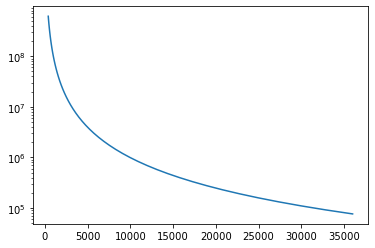

In [95]:
#Friis curve generated using the value of power at 400 km
P=power_output[0,2363, 35]
#for i in range (1,6):
P_t=P*((height[0]/height)**2)
    
plt.plot(height,P_t)
plt.yscale('log')
plt.show()

In [47]:
freq_rfi[35]

90.1796875

In [44]:
P1

510950692219.36194

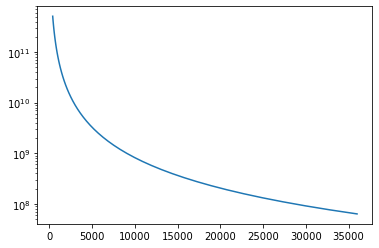

In [71]:
#Friis curve generated using the value of power at 400 km
P1=power_output1[0,2363, 35]
#for i in range (1,6):
P_t1=P1*((height[0]/height)**2)
    
plt.plot(height,P_t1)
plt.yscale('log')
plt.show()

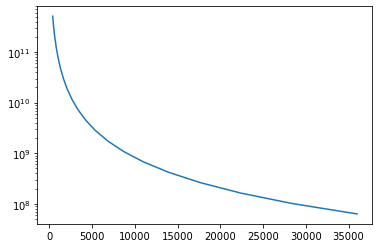

In [105]:
P1=power_output1[0,2363, 35]
#for i in range (1,6):
P_t1=P1*((height[0]/height)**2)
    
plt.plot(height,P_t1)
plt.yscale('log')
plt.show()

In [90]:
P_t

array([6.17401616e+08, 5.13810247e+08, 4.27600063e+08, 3.55854745e+08,
       2.96147288e+08, 2.46457909e+08, 2.05105714e+08, 1.70691840e+08,
       1.42052133e+08, 1.18217769e+08, 9.83824782e+07, 8.18752723e+07,
       6.81377451e+07, 5.67051831e+07, 4.71908453e+07, 3.92728805e+07,
       3.26834396e+07, 2.71996149e+07, 2.26358994e+07, 1.88379116e+07,
       1.56771731e+07, 1.30467624e+07, 1.08576979e+07, 9.03592782e+06,
       7.51982532e+06, 6.25810365e+06, 5.20808126e+06, 4.33423796e+06,
       3.60701336e+06, 3.00180689e+06, 2.49814562e+06, 2.07899167e+06,
       1.73016590e+06, 1.43986823e+06, 1.19827845e+06, 9.97224060e+05,
       8.29903790e+05, 6.90657524e+05, 5.74774837e+05, 4.78335647e+05,
       3.98077606e+05, 3.31285743e+05, 2.75700622e+05, 2.29441908e+05,
       1.90944760e+05, 1.58906896e+05, 1.32244538e+05, 1.10055752e+05,
       9.15899334e+04, 7.62224217e+04])

In [57]:
P_t1#with sin2 beam pattern

array([5.10950692e+11, 3.18177345e+11, 1.98134232e+11, 1.23381424e+11,
       7.68316289e+10, 4.78443108e+10, 2.97934341e+10, 1.85528583e+10,
       1.15531680e+10, 7.19434651e+09, 4.48003713e+09, 2.78979233e+09,
       1.73724927e+09, 1.08181351e+09, 6.73662949e+08, 4.19500926e+08,
       2.61230082e+08, 1.62672241e+08, 1.01298662e+08, 6.30803324e+07])

In [106]:
P_t1#without beam pattern
#Observation: We see that at larger FOV, the brightness temperature is 8.2X10^6 Kelvin times higher than predicted by Friis formula

array([5.11568094e+11, 3.18561811e+11, 1.98373645e+11, 1.23530511e+11,
       7.69244675e+10, 4.79021229e+10, 2.98294347e+10, 1.85752764e+10,
       1.15671282e+10, 7.20303972e+09, 4.48545053e+09, 2.79316334e+09,
       1.73934846e+09, 1.08312071e+09, 6.74476962e+08, 4.20007826e+08,
       2.61545736e+08, 1.62868804e+08, 1.01421066e+08, 6.31565548e+07])

In [ ]:
#Friis curve generated using the value of power at 400 km
P=power_output[0,2363, 35]
#for i in range (1,6):
P=((P*(height[0]**2))/(height**2))
    
plt.plot(height,P)
plt.yscale('log')
plt.show()

In [54]:
P

array([1.15593668e+09, 5.75580016e+07, 2.86600780e+06, 1.42708233e+05])

In [40]:
power_output[0,2363, 36]*(height[0]**2)/(3500**2)

15097948.538023086

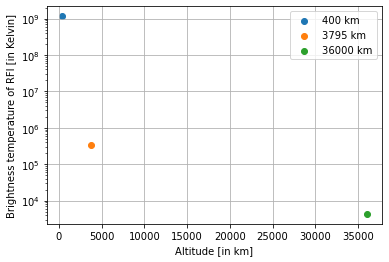

In [25]:
label=["400 km", "36000 km"]
label1=["400 km","3795 km", "36000 km"]
for i in range (0,3):
   # plt.plot(altitude[i],power_output[i,313, 36])
    #plt.scatter(altitude[i],power_output[i,313, 36],label=label[i] )
    plt.scatter(altitude[i],power_output[i,2363, 36],label=label1[i], marker='^' )
    plt.xlabel('Altitude [in km]')
    plt.ylabel('Brightness temperature of RFI [in Kelvin]')
    #plt.yscale('log')
    plt.grid()
plt.legend()
plt.show()

In [98]:
freq_rfi[35]

90.1796875

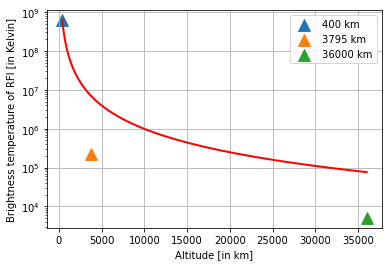

In [97]:
label=["400 km", "36000 km"]
label1=["400 km","3795 km", "36000 km"]
size=["k","orange","b"]
for i in range (0,3):
    plt.scatter(altitude[i],power_output[i,2363, 35],label=label1[i], marker='^', s=140)
    plt.yscale('log')
plt.xlabel('Altitude [in km]')
plt.ylabel('Brightness temperature of RFI [in Kelvin]')

plt.grid()
plt.plot(height,P, color='r',linewidth=2)
plt.legend()
plt.show()

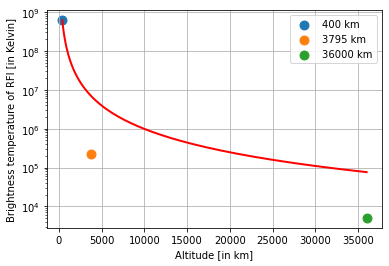

In [98]:

label1=["400 km","3795 km", "36000 km"]
size=["k","orange","b"]
for i in range (0,3):
    plt.scatter(altitude[i],power_output[i,2363, 35],label=label1[i], marker='o', s=80)
    plt.yscale('log')
plt.xlabel('Altitude [in km]')
plt.ylabel('Brightness temperature of RFI [in Kelvin]')

plt.grid()
plt.plot(height,P_t, color='r',linewidth=2)
plt.legend()
plt.show()

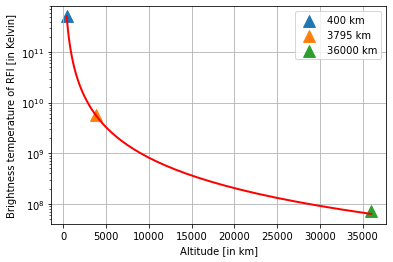

In [74]:
label1=["400 km","3795 km", "36000 km"]
size=["k","orange","b"]
for i in range (0,3):
    plt.scatter(altitude[i],power_output1[i,2363, 35],label=label1[i], marker='^', s=140)
    plt.yscale('log')
plt.xlabel('Altitude [in km]')
plt.ylabel('Brightness temperature of RFI [in Kelvin]')

plt.grid()
plt.plot(height,P_t1, color='r',linewidth=2)
plt.legend()
plt.show()

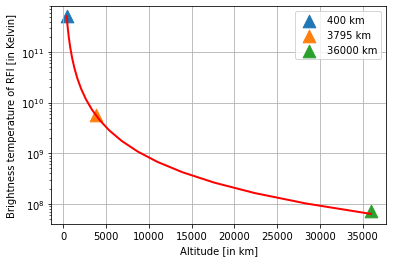

In [112]:


label1=["400 km","3795 km", "36000 km"]
size=["k","orange","b"]
for i in range (0,3):
    plt.scatter(altitude[i],power_output1[i,2363, 35],label=label1[i], marker='^', s=160)
    plt.yscale('log')
plt.xlabel('Altitude [in km]')
plt.ylabel('Brightness temperature of RFI [in Kelvin]')

plt.grid()
plt.plot(height,P_t1, color='r',linewidth=2)
plt.legend()
plt.show()

AttributeError: 'Line2D' object has no property 's'

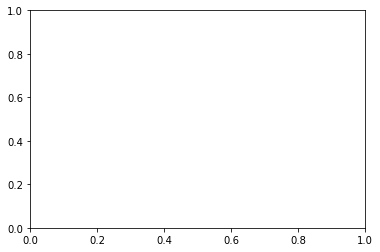

In [72]:
label1=["400 km","3795 km", "36000 km"]
size=["k","orange","b"]
for i in range (0,3):
    plt.plot(altitude[i],power_output1[i,2363, 35],label=label1[i], marker='^', s=140)
    plt.yscale('log')
plt.xlabel('Altitude [in km]')
plt.ylabel('Brightness temperature of RFI [in Kelvin]')

plt.grid()
plt.plot(height,P_t1, color='r',linewidth=2)
plt.legend()
plt.show()

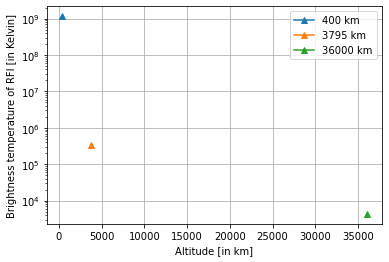

In [24]:
label=["400 km", "36000 km"]
label1=["400 km","3795 km", "36000 km"]
for i in range (0,3):
   
    plt.plot(altitude[i],power_output[i,2363, 36],label=label1[i], marker='^' )
    plt.xlabel('Altitude [in km]')
    plt.ylabel('Brightness temperature of RFI [in Kelvin]')
    plt.yscale('log')
    plt.grid()
plt.legend()
plt.show()

Text(0, 0.5, 'Temperature equivalent of RFI [in Kelvin]')

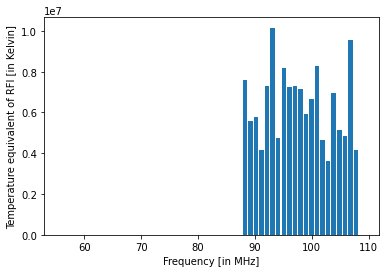

In [33]:
plt.bar(freq_rfi,power_output[1,313,:]) 
plt.xlabel('Frequency [in MHz]')
plt.ylabel('Temperature equivalent of RFI [in Kelvin]')
#plt.suptitle('Power spectrum for GERMANY at an altitude of 3795 km',fontsize=14, fontweight="bold")

Text(0, 0.5, 'Temperature equivalent of RFI [in Kelvin]')

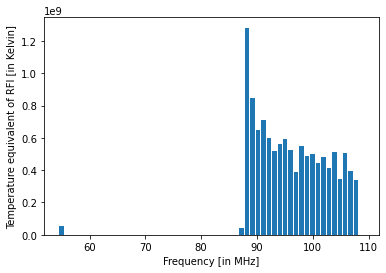

In [81]:
#Without beam-weighting
plt.bar(freq_rfi,power_output[1,313,:]) 
plt.xlabel('Frequency [in MHz]')
plt.ylabel('Temperature equivalent of RFI [in Kelvin]')

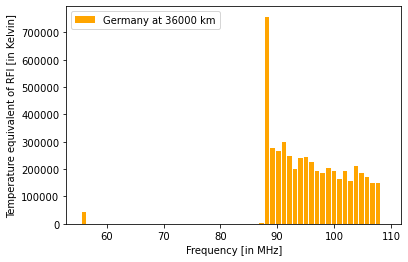

In [59]:
plt.bar(freq_rfi,power_output[1,313,:], label='Germany at 36000 km', color='orange') 
plt.xlabel('Frequency [in MHz]')
plt.ylabel('Brightness temperature of RFI [in Kelvin]')
plt.legend()
#plt.suptitle('Power spectrum for GERMANY at an altitude of 36000 km',fontsize=14, fontweight="bold")

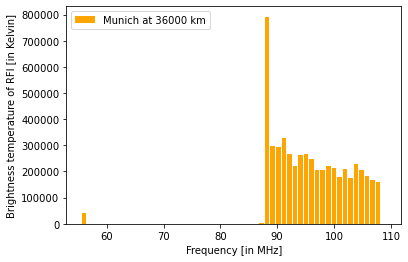

In [28]:
plt.bar(freq_rfi,power_output[2,365,:], label='Munich at 36000 km', color='orange') 
plt.xlabel('Frequency [in MHz]')
plt.ylabel('Brightness temperature of RFI [in Kelvin]')
plt.legend()

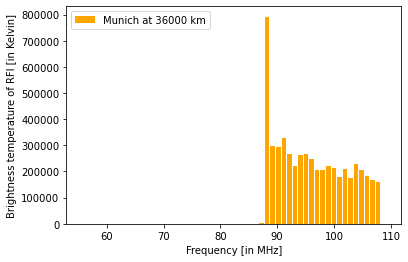

In [143]:
plt.bar(freq_rfi,power_output[2,365,:], label='Munich at 36000 km', color='orange') 
plt.xlabel('Frequency [in MHz]')
plt.ylabel('Brightness temperature of RFI [in Kelvin]')
plt.legend()

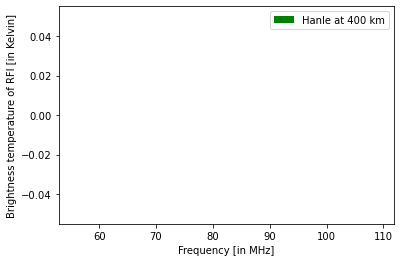

In [61]:
plt.bar(freq_rfi,power_output[0,686,:], label='Hanle at 400 km', color='green') 
plt.xlabel('Frequency [in MHz]')
plt.ylabel('Brightness temperature of RFI [in Kelvin]')
plt.legend()
#plt.suptitle('Power spectrum for HANLE at an altitude of 400 km',fontsize=14, fontweight="bold")

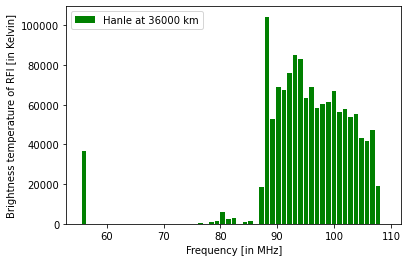

In [63]:
plt.bar(freq_rfi,power_output[1,686,:], label='Hanle at 36000 km', color='green') 
plt.xlabel('Frequency [in MHz]')
plt.ylabel('Brightness temperature of RFI [in Kelvin]')
plt.legend()
#plt.suptitle('Power spectrum for HANLE at an altitude of 36000 km',fontsize=14, fontweight="bold")

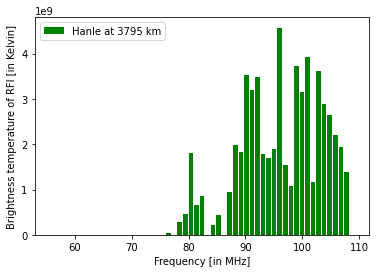

In [78]:
plt.bar(freq_rfi,power_output1[1,686,:], label='Hanle at 3795 km', color='green') 
plt.xlabel('Frequency [in MHz]')
plt.ylabel('Brightness temperature of RFI [in Kelvin]')
plt.legend()

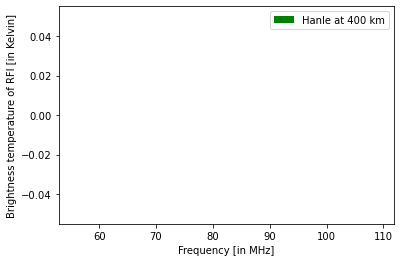

In [79]:
plt.bar(freq_rfi,power_output1[0,686,:], label='Hanle at 400 km', color='green') 
plt.xlabel('Frequency [in MHz]')
plt.ylabel('Brightness temperature of RFI [in Kelvin]')
plt.legend()

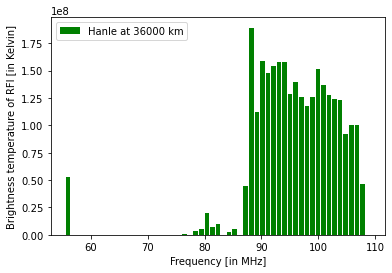

In [80]:
plt.bar(freq_rfi,power_output1[2,686,:], label='Hanle at 36000 km', color='green') 
plt.xlabel('Frequency [in MHz]')
plt.ylabel('Brightness temperature of RFI [in Kelvin]')
plt.legend()

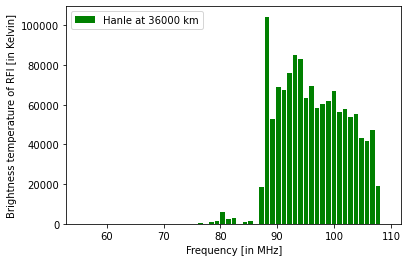

In [145]:
plt.bar(freq_rfi,power_output[2,686,:], label='Hanle at 36000 km', color='green') 
plt.xlabel('Frequency [in MHz]')
plt.ylabel('Brightness temperature of RFI [in Kelvin]')
plt.legend()

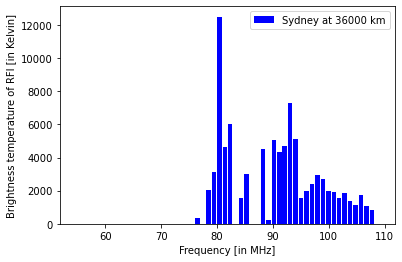

In [91]:
plt.bar(freq_rfi,power_output[1,2363,:],  label='Sydney at 36000 km', color='blue') 
plt.xlabel('Frequency [in MHz]')
plt.ylabel('Brightness temperature of RFI [in Kelvin]')
plt.legend()
#plt.suptitle('Power spectrum for AUSTRALIA at an altitude of 36000 km',fontsize=14, fontweight="bold")

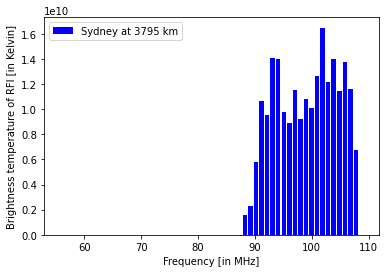

In [76]:
plt.bar(freq_rfi,power_output1[1,2363,:],  label='Sydney at 3795 km', color='blue') 
plt.xlabel('Frequency [in MHz]')
plt.ylabel('Brightness temperature of RFI [in Kelvin]')
plt.legend()

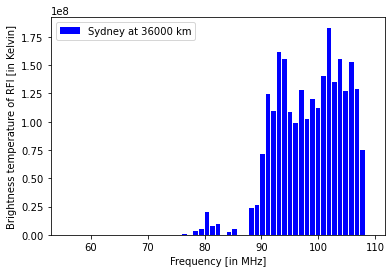

In [77]:
plt.bar(freq_rfi,power_output1[2,2363,:],  label='Sydney at 36000 km', color='blue') 
plt.xlabel('Frequency [in MHz]')
plt.ylabel('Brightness temperature of RFI [in Kelvin]')
plt.legend()

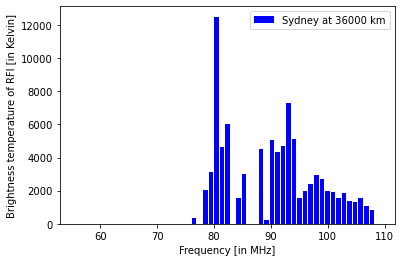

In [148]:
plt.bar(freq_rfi,power_output[2,2363,:],  label='Sydney at 36000 km', color='blue') 
plt.xlabel('Frequency [in MHz]')
plt.ylabel('Brightness temperature of RFI [in Kelvin]')
plt.legend()

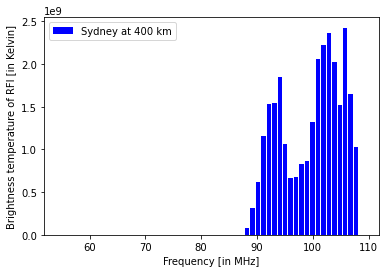

In [90]:
plt.bar(freq_rfi,power_output[0,2363,:], label='Sydney at 400 km', color='blue') 
plt.xlabel('Frequency [in MHz]')
plt.ylabel('Brightness temperature of RFI [in Kelvin]')
plt.legend()
#plt.suptitle('Power spectrum for AUSTRALIA at an altitude of 400 km',fontsize=14, fontweight="bold")

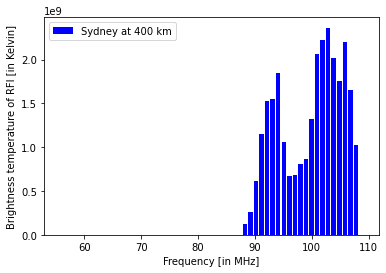

In [146]:
plt.bar(freq_rfi,power_output[0,2363,:], label='Sydney at 400 km', color='blue') 
plt.xlabel('Frequency [in MHz]')
plt.ylabel('Brightness temperature of RFI [in Kelvin]')
plt.legend()

In [149]:
freq_rfi[35]

90.1796875

In [150]:
freq_rfi[46]

100.921875

In [153]:
freq_rfi[53]

107.7578125

## Plot Healpy map of brightness temperature of RFI 

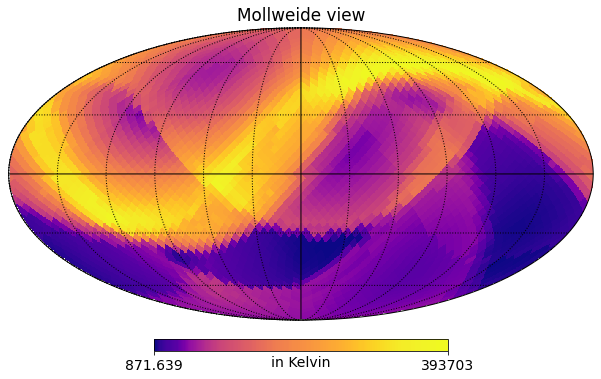

In [217]:
test_plot1 = np.zeros(hp.nside2npix(nside))
test_plot1[0:np.size(power_output[2,:,35])] = power_output[2,:,35]
hp.mollview(test_plot1,cmap='plasma',unit="in Kelvin",flip='geo',norm='hist')#,cb_orientation="vertical",title="Mollweide projection for Received power in Kelvin at 88.9MHz",flip='g')
hp.graticule()
#cmap = copy.copy(mpl.cm.get_cmap("inferno"))
#newcm.set_over(newcm(1.0))

In [213]:
test_plot = np.zeros(hp.nside2npix(nside))
test_plot[0:np.size(power_output[0,:,35])] = power_output[0,:,35]

In [211]:
test_plot

array([ 429307.23242218,       0.        , 1136718.66505406, ...,
             0.        ,       0.        ,       0.        ])

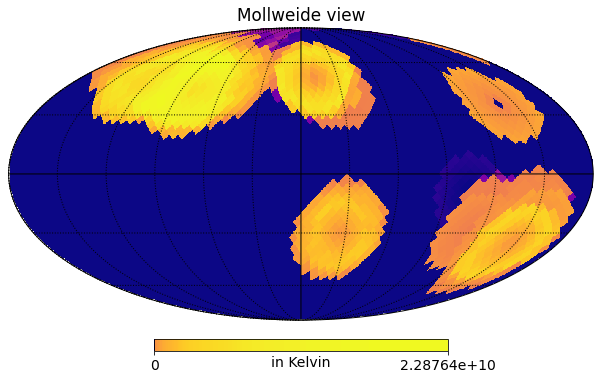

In [214]:

#from healpy.newvisufunc import projview, newprojplot
hp.mollview(test_plot,cmap='plasma',unit="in Kelvin",flip='geo',norm="hist")
hp.graticule()


#matplotlib.rcParams.update({'font.size': 14}) # fontsize for colorbar's values
#fontsize = 22

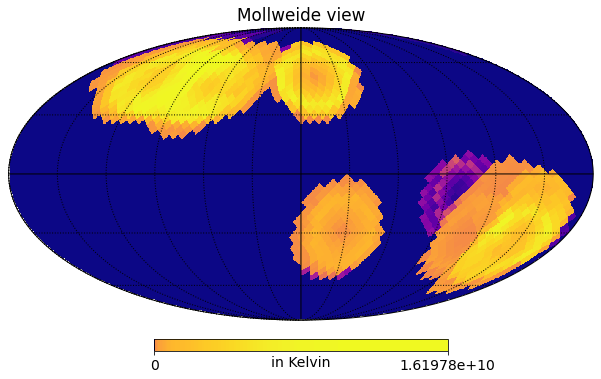

In [218]:

test_plot11 = np.zeros(hp.nside2npix(nside))
test_plot11[0:np.size(power_output[0,:,46])] = power_output[0,:,46]
hp.mollview(test_plot11,cmap='plasma',unit="in Kelvin",flip='geo',norm='hist')
hp.graticule()

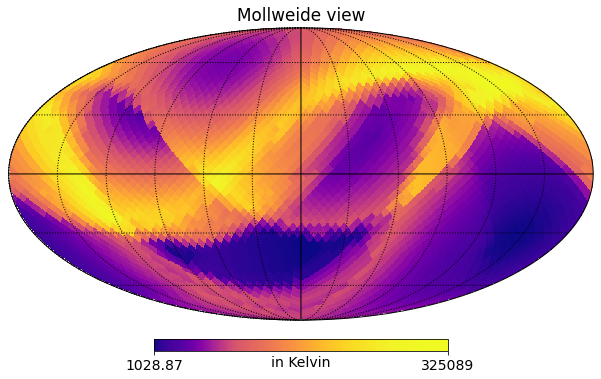

In [220]:
test_plot12 = np.zeros(hp.nside2npix(nside))
test_plot12[0:np.size(power_output[2,:,46])] = power_output[2,:,46]
hp.mollview(test_plot12,cmap='plasma',unit="in Kelvin",flip='geo',norm='hist')#,cb_orientation="vertical",title="Mollweide projection for Received power in Kelvin at 88.9MHz",flip='g')
hp.graticule()

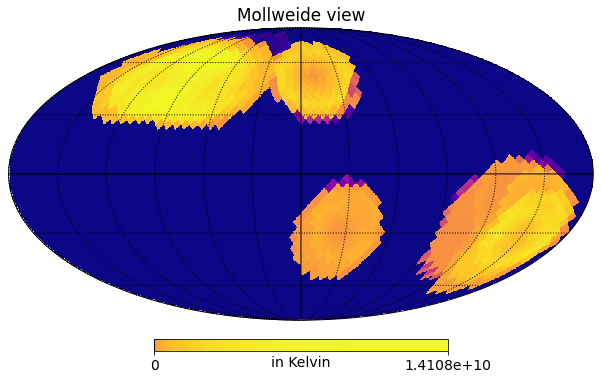

In [221]:
test_plot13 = np.zeros(hp.nside2npix(nside))
test_plot13[0:np.size(power_output[0,:,53])] = power_output[0,:,53]
hp.mollview(test_plot13,cmap='plasma',unit="in Kelvin",flip='geo',norm='hist')#,cb_orientation="vertical",title="Mollweide projection for Received power in Kelvin at 88.9MHz",flip='g')
hp.graticule()

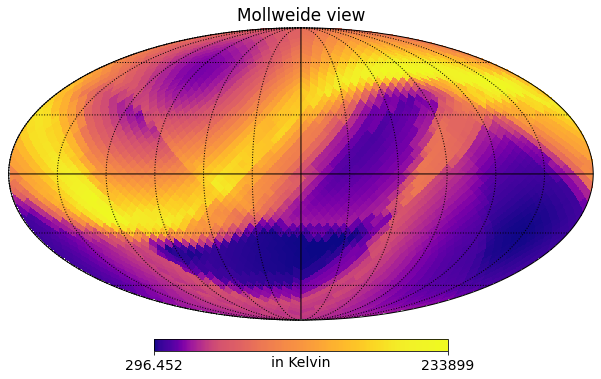

In [222]:
test_plot14 = np.zeros(hp.nside2npix(nside))
test_plot14[0:np.size(power_output[2,:,53])] = power_output[2,:,53]
hp.mollview(test_plot14,cmap='plasma',unit="in Kelvin",flip='geo',norm='hist')#,cb_orientation="vertical",title="Mollweide projection for Received power in Kelvin at 88.9MHz",flip='g')
hp.graticule()

In [ ]:
test_plot0001 = np.zeros(hp.nside2npix(nside))
test_plot0001[0:np.size(power_output[0,:,6])] = power_output[0,:,6]
hp.mollview(test_plot0001,cmap='inferno',unit="in Kelvin",title="Mollweide projection at an altitude 400 km for Received power in Kelvin at 90 MHz",flip='geo',norm='hist')#xsize=24)#,cb_orientation="vertical",title="Mollweide projection for Received power in Kelvin at 88.9MHz",flip='g')
hp.graticule()
s = 500
plt.scatter(np.deg2rad(10.45), np.deg2rad(51.16), color="r", marker="x", linewidth=10, s=s);
plt.scatter(np.deg2rad(22.93), np.deg2rad(-30.559), color="r", marker="x", linewidth=10, s=s);
#plt.scatter(np.deg2rad(10), np.deg2rad(90), color="r", marker="x", linewidth=10, s=s);

#hp.boundaries()
#newprojplot(np.radians(df['Latitude in degrees'].to_numpy()), np.radians(df['Longitude in degrees'].to_numpy()))

In [ ]:
# Replacing the power value of 0 to a minimum value 1.000001 in order to apply logarithmic equalization in 
# the Healpy map


power_output_log=np.where(power_output[0,:,6]==0, 1.0000001, power_output[0,:,6])
power_output_log

In [ ]:
###-------Plotting of the Healpy Map in mollweide projection------###
#####------For an altitude of 400 km at 90 MHz with logarithmic equalization----------------------#######


test_plot12 = np.zeros(hp.nside2npix(nside))
test_plot12[0:np.size(power_output[0,:,6])] = power_output_log
test_plot12=np.where(test_plot12==0, 1.0000001,test_plot12 )

In [ ]:
hp.mollview(test_plot12,cmap='inferno',unit="in Kelvin",title="Mollweide projection at an altitude 400 km for Received power in Kelvin at 90 MHz",flip='geo',norm="log")#,cb_orientation="vertical",title="Mollweide projection for Received power in Kelvin at 88.9MHz",flip='g')
hp.graticule()